<a href="https://colab.research.google.com/github/sharvanitamaskar/Principle-Component-Analysis-using-Differential-Privacy/blob/main/PrivatePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving u.data to u.data


In [ ]:
df = pd.read_csv("u.data",sep='\t', header=None)

In [ ]:
df.head(15)

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [ ]:
#preprocess
df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df = df.astype({
    'UserID': 'int',
    'MovieID': 'int',
    'Rating': 'int',
    'Timestamp': 'int'
})

print(df)

       UserID  MovieID  Rating  Timestamp
0         196      242       3  881250949
1         186      302       3  891717742
2          22      377       1  878887116
3         244       51       2  880606923
4         166      346       1  886397596
...       ...      ...     ...        ...
99995     880      476       3  880175444
99996     716      204       5  879795543
99997     276     1090       1  874795795
99998      13      225       2  882399156
99999      12      203       3  879959583

[100000 rows x 4 columns]


In [ ]:
df['UserID'].unique()

array([196, 186,  22, 244, 166, 298, 115, 253, 305,   6,  62, 286, 200,
       210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308,  95,  38,
       102,  63, 160,  50, 301, 225, 290,  97, 157, 181, 278, 276,   7,
        10, 284, 201, 287, 246, 242, 249,  99, 178, 251,  81, 260,  25,
        59,  72,  87,  42, 292,  20,  13, 138,  60,  57, 223, 189, 243,
        92, 241, 254, 293, 127, 222, 267,  11,   8, 162, 279, 145,  28,
       135,  32,  90, 216, 250, 271, 265, 198, 168, 110,  58, 237,  94,
       128,  44, 264,  41,  82, 262, 174,  43,  84, 269, 259,  85, 213,
       121,  49, 155,  68, 172,  19, 268,   5,  80,  66,  18,  26, 130,
       256,   1,  56,  15, 207, 232,  52, 161, 148, 125,  83, 272, 151,
        54,  16,  91, 294, 229,  36,  70,  14, 295, 233, 214, 192, 100,
       307, 297, 193, 113, 275, 219, 218, 123, 158, 302,  23, 296,  33,
       154,  77, 270, 187, 170, 101, 184, 112, 133, 215,  69, 104, 240,
       144, 191,  61, 142, 177, 203,  21, 197, 134, 180, 236, 26

In [ ]:
len(df['UserID'].unique())
# we have 953 uniqiue users whose uder ID ranges from 1->943

943

In [ ]:
df['MovieID'].unique()

array([ 242,  302,  377, ..., 1637, 1630, 1641])

In [ ]:
len(df['MovieID'].unique())
#Each user has voted for atleast 20 movies

1682

In [ ]:
df['UserID'].isnull().sum()
#check for nulls

0

In [ ]:
df['MovieID'].isnull().sum()
#no null nulls present

0

In [ ]:
df['Rating'].min()

1

In [ ]:
df['Rating'].max()

5

In [ ]:
df.UserID = df.UserID.astype('category').cat.codes.values
df.MovieID = df.MovieID.astype('category').cat.codes.values

In [ ]:
df['UserID'].value_counts(ascending=True)

UserID
363     20
823     20
635     20
142     20
630     20
      ... 
275    518
449    540
12     636
654    685
404    737
Name: count, Length: 943, dtype: int64

In [ ]:
df['MovieID'].unique()

array([ 241,  301,  376, ..., 1636, 1629, 1640], dtype=int16)

In [ ]:
index=list(df['UserID'].unique())
columns=list(df['MovieID'].unique())
index=sorted(index)
columns=sorted(columns)

util_df=pd.pivot_table(data=df,values='Rating',index='UserID',columns='MovieID')

In [ ]:
util_df
#nulls show the movies unrated by users

MovieID,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
UserID,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
util_df=util_df.fillna(0)

In [ ]:
util_df

MovieID,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
UserID,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
class MatrixDataLoader:
  def __init__(self):
        self.A = None
  def load_dataset(self, df):
        self.A = df.values
  def generate_gaussian_matrix(self, rows, columns, mean=0, std_dev=1):
    """Generate a matrix with Gaussian distributed values."""
    self.A = np.random.normal(mean, std_dev, (rows, columns))

loader = MatrixDataLoader()


In [ ]:
loader.load_dataset(util_df)
print("Dataset loaded into matrix A:\n", loader.A)

Dataset loaded into matrix A:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [ ]:
loader.generate_gaussian_matrix(rows=100, columns=100, mean=0, std_dev=1)
print("Synthetic Gaussian matrix A:\n", loader.A)

Synthetic Gaussian matrix A:
 [[ 1.30161485 -2.05649071  0.54840569 ... -0.19273049 -0.92681849
   0.2659865 ]
 [ 0.90453499 -0.4290323   0.2258837  ...  2.10183494  0.43696335
  -0.18018272]
 [-0.01054744 -0.68855012 -0.84866683 ...  0.60371543 -0.08064109
  -1.51766113]
 ...
 [ 0.59237282  0.9959816  -0.6172319  ...  0.81995347 -0.68964746
   2.86860884]
 [-0.28951424 -0.01960394  0.48100577 ... -1.17939832  0.31433968
  -2.34327467]
 [ 0.60080232 -1.80601908  1.21534688 ...  1.29667471  1.72027749
   0.72095569]]


In [ ]:
Ag=loader.A

In [ ]:
U, S, VT = np.linalg.svd(np.dot(Ag.T,Ag))
print("U:\n", U) #direction in the original space where your data lies.
print("Singular Values:", S) #contains the singular values of Ag
#square roots of the eigenvalues AgAg(t)
print("VT:\n", VT) #contains the right singular vectors of Ag
#captures features and pattersn of Ag

U:
 [[-9.59509371e-02  8.72397853e-02  1.69737618e-02 ... -5.53573924e-20
  -3.24584870e-19 -4.42647285e-19]
 [-3.51795155e-02  7.02505798e-03  6.25039193e-02 ... -6.02809101e-20
   1.57802582e-19 -3.94470036e-19]
 [-1.99288117e-02  2.86181725e-02  1.16405039e-02 ...  1.23525095e-19
  -3.53491761e-20 -4.12546605e-19]
 ...
 [-3.03747116e-05  4.48134760e-04 -5.33024145e-04 ... -2.19315423e-17
   2.73881426e-16  4.58708498e-16]
 [-3.31055915e-04 -1.05231342e-04  4.54336533e-04 ... -1.12492842e-17
   1.68595804e-16  2.77105146e-16]
 [-3.16852950e-04 -2.03151884e-04  2.61400068e-04 ...  8.17075339e-18
  -9.33176522e-17 -1.59007637e-16]]
Singular Values: [4.10411438e+05 5.99448362e+04 4.74569776e+04 ... 4.01028808e-11
 4.01028808e-11 4.01028808e-11]
VT:
 [[-9.59509371e-02 -3.51795155e-02 -1.99288117e-02 ... -3.03747116e-05
  -3.31055915e-04 -3.16852950e-04]
 [ 8.72397853e-02  7.02505798e-03  2.86181725e-02 ...  4.48134760e-04
  -1.05231342e-04 -2.03151884e-04]
 [ 1.69737618e-02  6.25039193e-

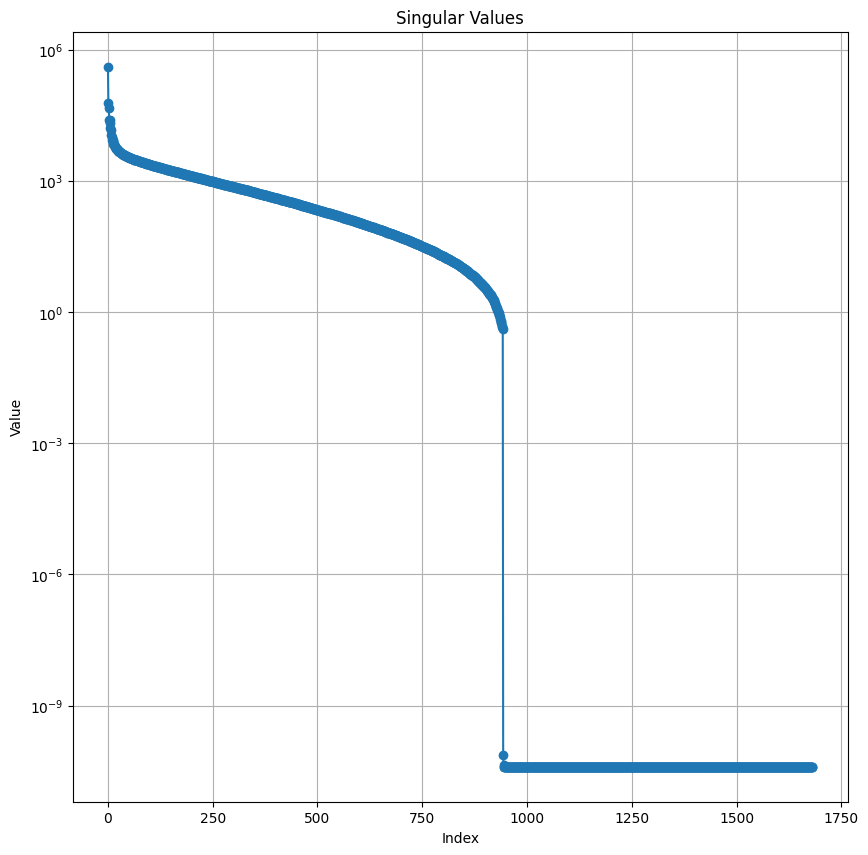

In [ ]:
#output/plot separet singular values for movie lens

import matplotlib.pyplot as plt
# plotting the singular values
plt.figure(figsize=(10, 10))
plt.plot(S, marker='o')
plt.title('Singular Values')
plt.xlabel('Index') #gives position of each singular value in the Σ matrix, starting from 0
plt.ylabel('Value') #magnitude of each singular value on a logarithmic scale
plt.yscale('log')
# log scale to see the drop off graph clearly
plt.grid(True)
plt.show()

In [ ]:
k_values = range(1, 11, 1)  # values of k to iterate over
approximations = []  # store the rank-k approximations

for k in k_values:
    if k == 0: continue
    U_k = U[:, :k]  # get the first k columns of U
    S_k_diag = np.diag(S[:k])  # create diagonal matrix from the first k singular values
    VT_k = VT[:k, :]  # get the first k rows of VT

    # calculate the rank-k approximation
    A_k = np.dot(U_k, np.dot(S_k_diag, VT_k))

    approximations.append(A_k)
    print(f"Rank-{k} Approximation of Ag^TAg:\n", A_k)

Rank-1 Approximation of Ag^TAg:
 [[3.77848669e+03 1.38534688e+03 7.84783891e+02 ... 1.19613676e+00
  1.30367708e+01 1.24774671e+01]
 [1.38534688e+03 5.07924503e+02 2.87733689e+02 ... 4.38552380e-01
  4.77981032e+00 4.57474684e+00]
 [7.84783891e+02 2.87733689e+02 1.62997995e+02 ... 2.48435138e-01
  2.70771039e+00 2.59154416e+00]
 ...
 [1.19613676e+00 4.38552380e-01 2.48435138e-01 ... 3.78655074e-04
  4.12698576e-03 3.94992977e-03]
 [1.30367708e+01 4.77981032e+00 2.70771039e+00 ... 4.12698576e-03
  4.49802806e-02 4.30505360e-02]
 [1.24774671e+01 4.57474684e+00 2.59154416e+00 ... 3.94992977e-03
  4.30505360e-02 4.12035814e-02]]
Rank-2 Approximation of Ag^TAg:
 [[ 4.23471366e+03  1.42208494e+03  9.34444760e+02 ...  3.53969094e+00
   1.24864556e+01  1.14150691e+01]
 [ 1.42208494e+03  5.10882867e+02  2.99785257e+02 ...  6.27269075e-01
   4.73549572e+00  4.48919634e+00]
 [ 9.34444760e+02  2.99785257e+02  2.12092804e+02 ...  1.01721554e+00
   2.52718479e+00  2.24303474e+00]
 ...
 [ 3.53969094e

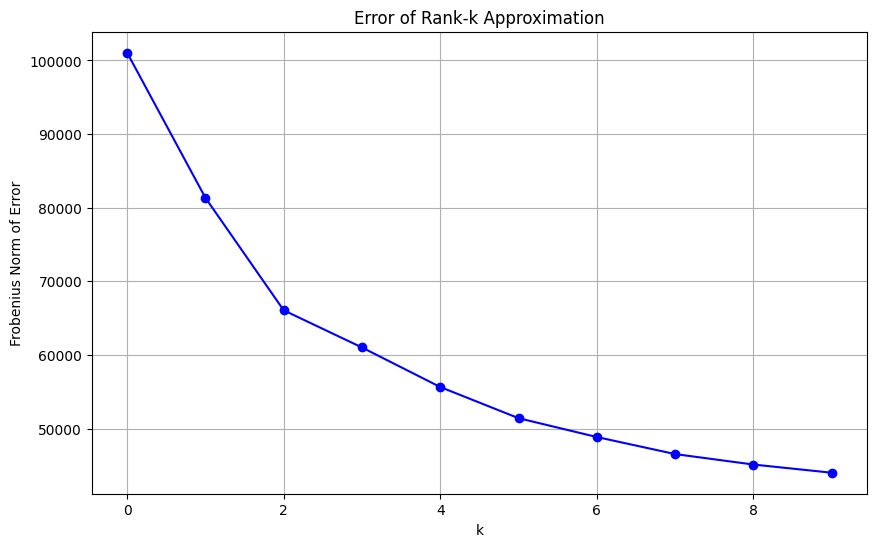

In [ ]:
Ag_T_Ag = np.dot(Ag.T, Ag)

# Frobenius norm of the error for each approximation
errors = [np.linalg.norm(Ag_T_Ag - A_k, 'fro') for A_k in approximations]

plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='blue')  # Skipping the first k=0 as it's not used
plt.title('Error of Rank-k Approximation')
plt.xlabel('k')
plt.ylabel('Frobenius Norm of Error')
plt.grid(True)
plt.show()

In [ ]:
noise_mean = 0  #mean of the Gaussian noise
noise_std_dev = 0.1  #std deviation of the Gaussian noise
rows, columns = Ag.shape #Shape of Ag
noise = np.random.normal(noise_mean, noise_std_dev, (rows, columns))
#generating Gaussian noise with the same shape
Ag_noisy = Ag + noise #adding the noise
print("Rank-k Approximation of AgAg^T with Gaussian Noise:\n", Ag_noisy)

Rank-k Approximation of AgAg^T with Gaussian Noise:
 [[ 4.96585987  3.03025364  4.01502003 ... -0.0363233   0.10653231
  -0.03495761]
 [ 3.95317915 -0.18873649 -0.12825382 ...  0.02001362 -0.07220656
   0.09321825]
 [-0.10075899 -0.22025455  0.10185863 ... -0.04543602  0.02148668
  -0.04379692]
 ...
 [ 5.05547264 -0.01271002  0.00614015 ... -0.1166077  -0.01140327
  -0.00922178]
 [ 0.05140788  0.07133186 -0.04937619 ...  0.04785359 -0.04408814
   0.10524304]
 [ 0.04533989  5.03380057  0.09415815 ... -0.13165591 -0.06795654
   0.2066202 ]]


In [ ]:
U_noisy, S_noisy, VT_noisy = np.linalg.svd(np.dot(Ag_noisy.T,Ag_noisy))
print("U_noisy:\n", U_noisy)
print("Singular Values:", S_noisy)
print("VT_noisy:\n", VT_noisy)

U_noisy:
 [[-9.60730998e-02  8.75465178e-02  1.80885456e-02 ... -1.67604635e-04
  -2.28229196e-02  6.32918211e-02]
 [-3.51505077e-02  7.27256468e-03  6.25940321e-02 ... -5.23764073e-04
  -2.57398201e-01  2.18838795e-01]
 [-1.98272543e-02  2.87030661e-02  1.17841992e-02 ...  1.97814890e-04
  -3.29609364e-02  1.57600881e-01]
 ...
 [-8.53744442e-05  6.74484929e-04 -7.79573183e-04 ... -5.19538614e-02
  -1.55854771e-02 -1.36933271e-02]
 [-4.43442109e-04  4.00706840e-04  5.59287117e-04 ...  1.01452901e-02
  -1.20614818e-02 -1.96205718e-02]
 [-2.51433674e-04 -2.36114184e-04 -2.26673591e-04 ...  5.02590549e-02
  -1.23760479e-02  1.67306329e-02]]
Singular Values: [4.10489503e+05 5.98574332e+04 4.75243538e+04 ... 4.01085085e-11
 3.49395714e-11 8.25696127e-12]
VT_noisy:
 [[-9.60730998e-02 -3.51505077e-02 -1.98272543e-02 ... -8.53744442e-05
  -4.43442109e-04 -2.51433674e-04]
 [ 8.75465178e-02  7.27256468e-03  2.87030661e-02 ...  6.74484929e-04
   4.00706840e-04 -2.36114184e-04]
 [ 1.80885456e-02  

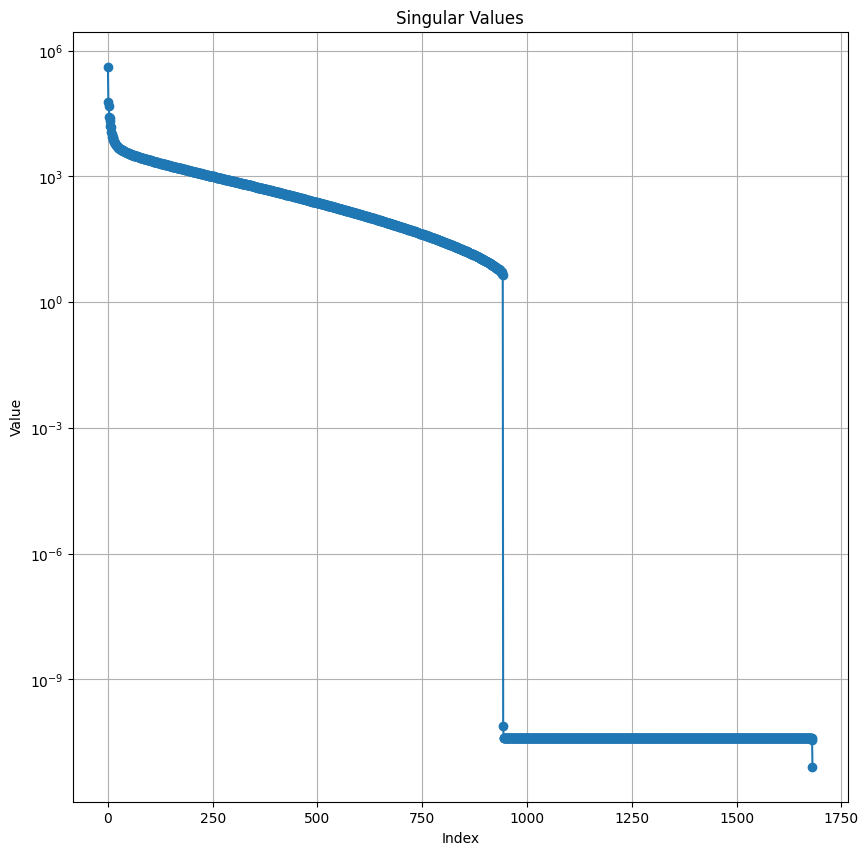

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(S_noisy, marker='o')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
plt.grid(True)
plt.show()

In [ ]:
k_values = range(1, 11, 1)
approximations = []

for k in k_values:
    if k == 0: continue
    U_k_noisy = U_noisy[:, :k]
    S_k_diag_noisy = np.diag(S_noisy[:k])
    VT_k_noisy = VT_noisy[:k, :]

    A_k_noisy = np.dot(U_k_noisy, np.dot(S_k_diag_noisy, VT_k_noisy))

    approximations.append(A_k_noisy)
    print(f"Rank-{k} Approximation of Ag^TAg:\n", A_k_noisy)

Rank-1 Approximation of Ag^TAg:
 [[3.78883474e+03 1.38623054e+03 7.81927408e+02 ... 3.36691187e+00
  1.74880260e+01 9.91578955e+00]
 [1.38623054e+03 5.07183667e+02 2.86085756e+02 ... 1.23186055e+00
  6.39838825e+00 3.62791497e+00]
 [7.81927408e+02 2.86085756e+02 1.61371639e+02 ... 6.94852337e-01
  3.60912201e+00 2.04638844e+00]
 ...
 [3.36691187e+00 1.23186055e+00 6.94852337e-01 ... 2.99197413e-03
  1.55405676e-02 8.81157185e-03]
 [1.74880260e+01 6.39838825e+00 3.60912201e+00 ... 1.55405676e-02
  8.07190271e-02 4.57680521e-02]
 [9.91578955e+00 3.62791497e+00 2.04638844e+00 ... 8.81157185e-03
  4.57680521e-02 2.59506918e-02]]
Rank-2 Approximation of Ag^TAg:
 [[ 4.24760562e+03  1.42434103e+03  9.32340368e+02 ...  6.90142188e+00
   1.95878540e+01  8.67847807e+00]
 [ 1.42434103e+03  5.10349539e+02  2.98580690e+02 ...  1.52547534e+00
   6.57282277e+00  3.52513044e+00]
 [ 9.32340368e+02  2.98580690e+02  2.10686143e+02 ...  1.85367940e+00
   4.29757317e+00  1.64072259e+00]
 ...
 [ 6.90142188e

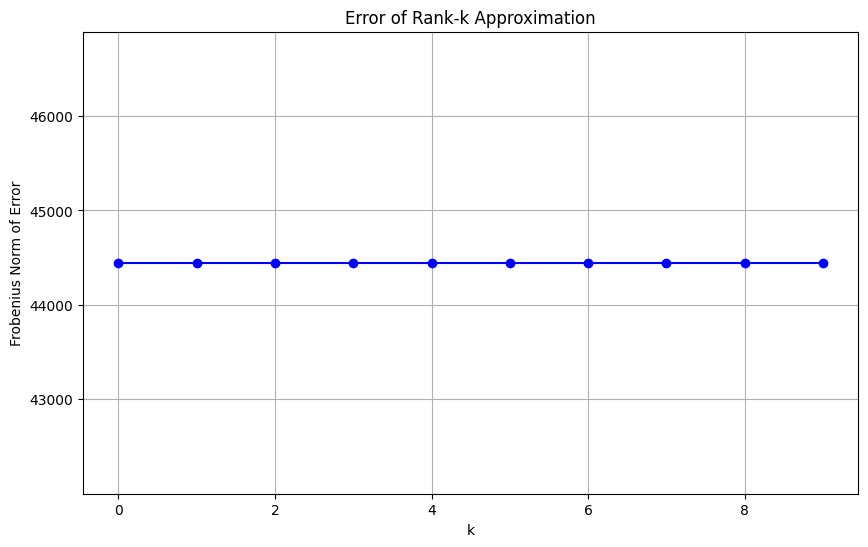

In [ ]:
Ag_T_Ag_noisy = np.dot(Ag_noisy.T, Ag_noisy)

errors = [np.linalg.norm(Ag_T_Ag_noisy - A_k_noisy, 'fro') for A_k in approximations]

plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='blue')
plt.title('Error of Rank-k Approximation')
plt.xlabel('k')
plt.ylabel('Frobenius Norm of Error')
plt.grid(True)
plt.show()

In [ ]:
mse = np.mean((A_k_noisy - A_k) ** 2)
print("MSE", mse)

MSE 7.614831023933583
